In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("train (1).csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
df_num = data.select_dtypes(include=['float64', 'int64'])
df_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [4]:
# Select relevant features and target
df = df_num[['Id','LotArea','MasVnrArea','TotalBsmtSF','GrLivArea','GarageArea','WoodDeckSF',
             'OpenPorchSF','EnclosedPorch','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
             'BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','SalePrice']]

# Drop rows with missing values
df = df.dropna()
df.head()

,Id,LotArea,MasVnrArea,TotalBsmtSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,SalePrice
0,1,8450,196.0,856,1710,548,0,61,0,1,0,2,1,3,1,8,208500
1,2,9600,0.0,1262,1262,460,298,0,0,0,1,2,0,3,1,6,181500
2,3,11250,162.0,920,1786,608,0,42,0,1,0,2,1,3,1,6,223500
3,4,9550,0.0,756,1717,642,0,35,272,1,0,1,0,3,1,7,140000
4,5,14260,350.0,1145,2198,836,192,84,0,1,0,2,1,4,1,9,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1452 non-null   int64  
 1   LotArea        1452 non-null   int64  
 2   MasVnrArea     1452 non-null   float64
 3   TotalBsmtSF    1452 non-null   int64  
 4   GrLivArea      1452 non-null   int64  
 5   GarageArea     1452 non-null   int64  
 6   WoodDeckSF     1452 non-null   int64  
 7   OpenPorchSF    1452 non-null   int64  
 8   EnclosedPorch  1452 non-null   int64  
 9   BsmtFullBath   1452 non-null   int64  
 10  BsmtHalfBath   1452 non-null   int64  
 11  FullBath       1452 non-null   int64  
 12  HalfBath       1452 non-null   int64  
 13  BedroomAbvGr   1452 non-null   int64  
 14  KitchenAbvGr   1452 non-null   int64  
 15  TotRmsAbvGrd   1452 non-null   int64  
 16  SalePrice      1452 non-null   int64  
dtypes: float64(1), int64(16)
memory usage: 204.2 KB


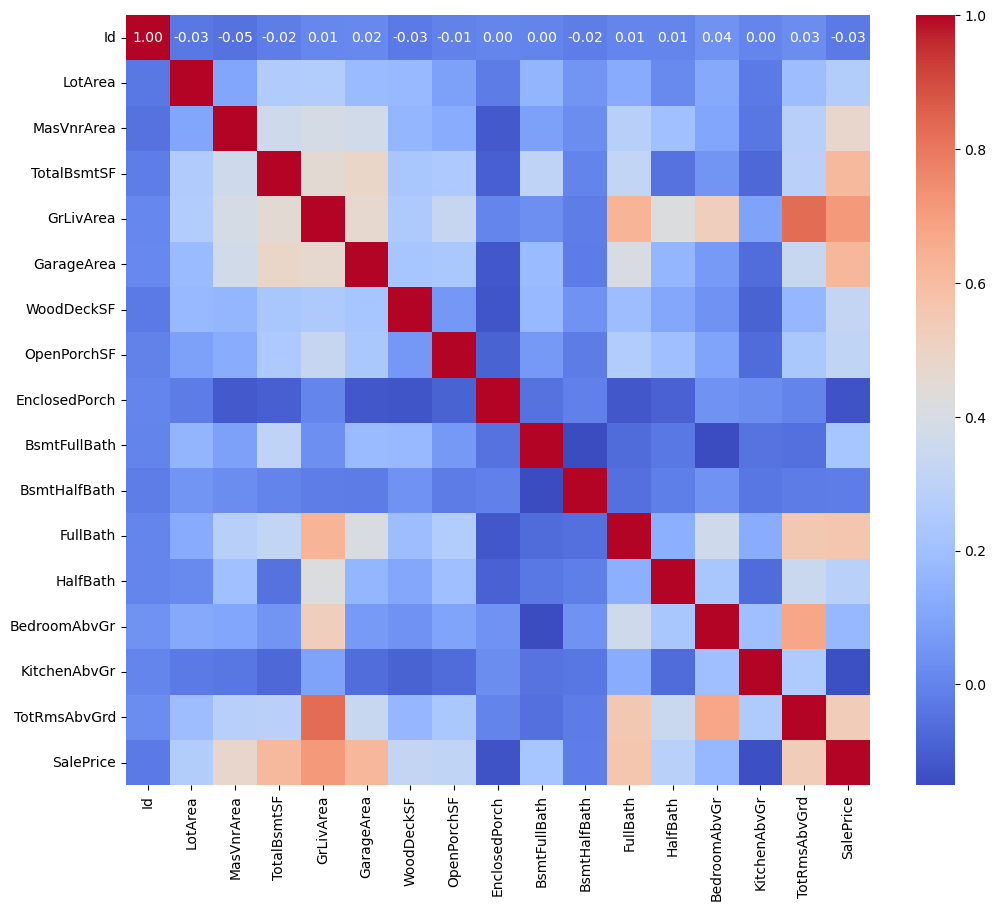

In [6]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.show()


In [7]:
X = df.drop(["Id","SalePrice"], axis=1)
y = df[["SalePrice"]]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Add a column of ones to the features for the bias term
X_train_scaled = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_scaled = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

In [11]:
alpha = 0.01
iterations = 1000

In [12]:
def gradiant_descent(X, y,alpha ,iterations):
    
    theta = np.zeros((X.shape[1], 1))
    
    for i in range(iterations):
        error = np.dot(X, theta) - y
        gradient = np.dot(X.T, error) / len(y)
        theta -= alpha * gradient
    return theta

In [13]:
theta= gradiant_descent(X_train_scaled, y_train ,alpha ,iterations)
y_pred = np.dot(X_test_scaled, theta)

In [14]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

Mean Squared Error on Test Set: 1314326243.9389832


In [15]:
r_squared = r2_score(y_test, y_pred)
print(f'R-squared on Test Set: {r_squared}')

R-squared on Test Set: 0.7847653043903335


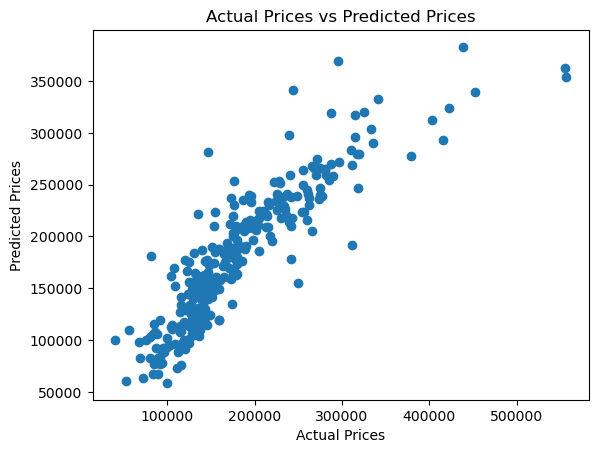

In [16]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()
